In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


In [ ]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/lithium/OUTPUT_sensitivity33.csv')
data.head()


Type  Year  Cathode Scenario  Location scenario  location of recycling   \
0     2  2020                 1                  2                       1   
1     1  2020                 1                  2                       1   
2     0  2020                 1                  2                       1   
3     2  2020                 1                  1                       1   
4     1  2020                 1                  1                       1   

   scenarios  Virgin material value ($)  Cost to recycle ($)  Profit ($)  
0         19                       4.98                 5.18       -0.20  
1         19                       5.52                 5.18        0.34  
2         19                       8.05                 7.52        0.53  
3         19                       4.98                 4.89        0.09  
4         19                       5.52                 4.89        0.63

In [ ]:
X = data.drop('Profit ($)', axis=1)
y = data['Profit ($)']


print(X,y)



      Type  Year  Cathode Scenario  Location scenario  location of recycling   \
0        2  2020                 1                  2                       1   
1        1  2020                 1                  2                       1   
2        0  2020                 1                  2                       1   
3        2  2020                 1                  1                       1   
4        1  2020                 1                  1                       1   
...    ...   ...               ...                ...                     ...   
8581     2  2050                 1                  2                       2   
8582     2  2050                 1                  2                       2   
8583     2  2050                 1                  2                       2   
8584     2  2050                 1                  2                       2   
8585     2  2050                 1                  2                       2   

      scenarios  Virgin mat

Data Summary:
   Type  Year  Cathode Scenario  Location scenario  location of recycling   \
0     2  2020                 1                  2                       1   
1     1  2020                 1                  2                       1   
2     0  2020                 1                  2                       1   
3     2  2020                 1                  1                       1   
4     1  2020                 1                  1                       1   

   scenarios  Virgin material value ($)  Cost to recycle ($)  Profit ($)  
0         19                       4.98                 5.18       -0.20  
1         19                       5.52                 5.18        0.34  
2         19                       8.05                 7.52        0.53  
3         19                       4.98                 4.89        0.09  
4         19                       5.52                 4.89        0.63  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8586 

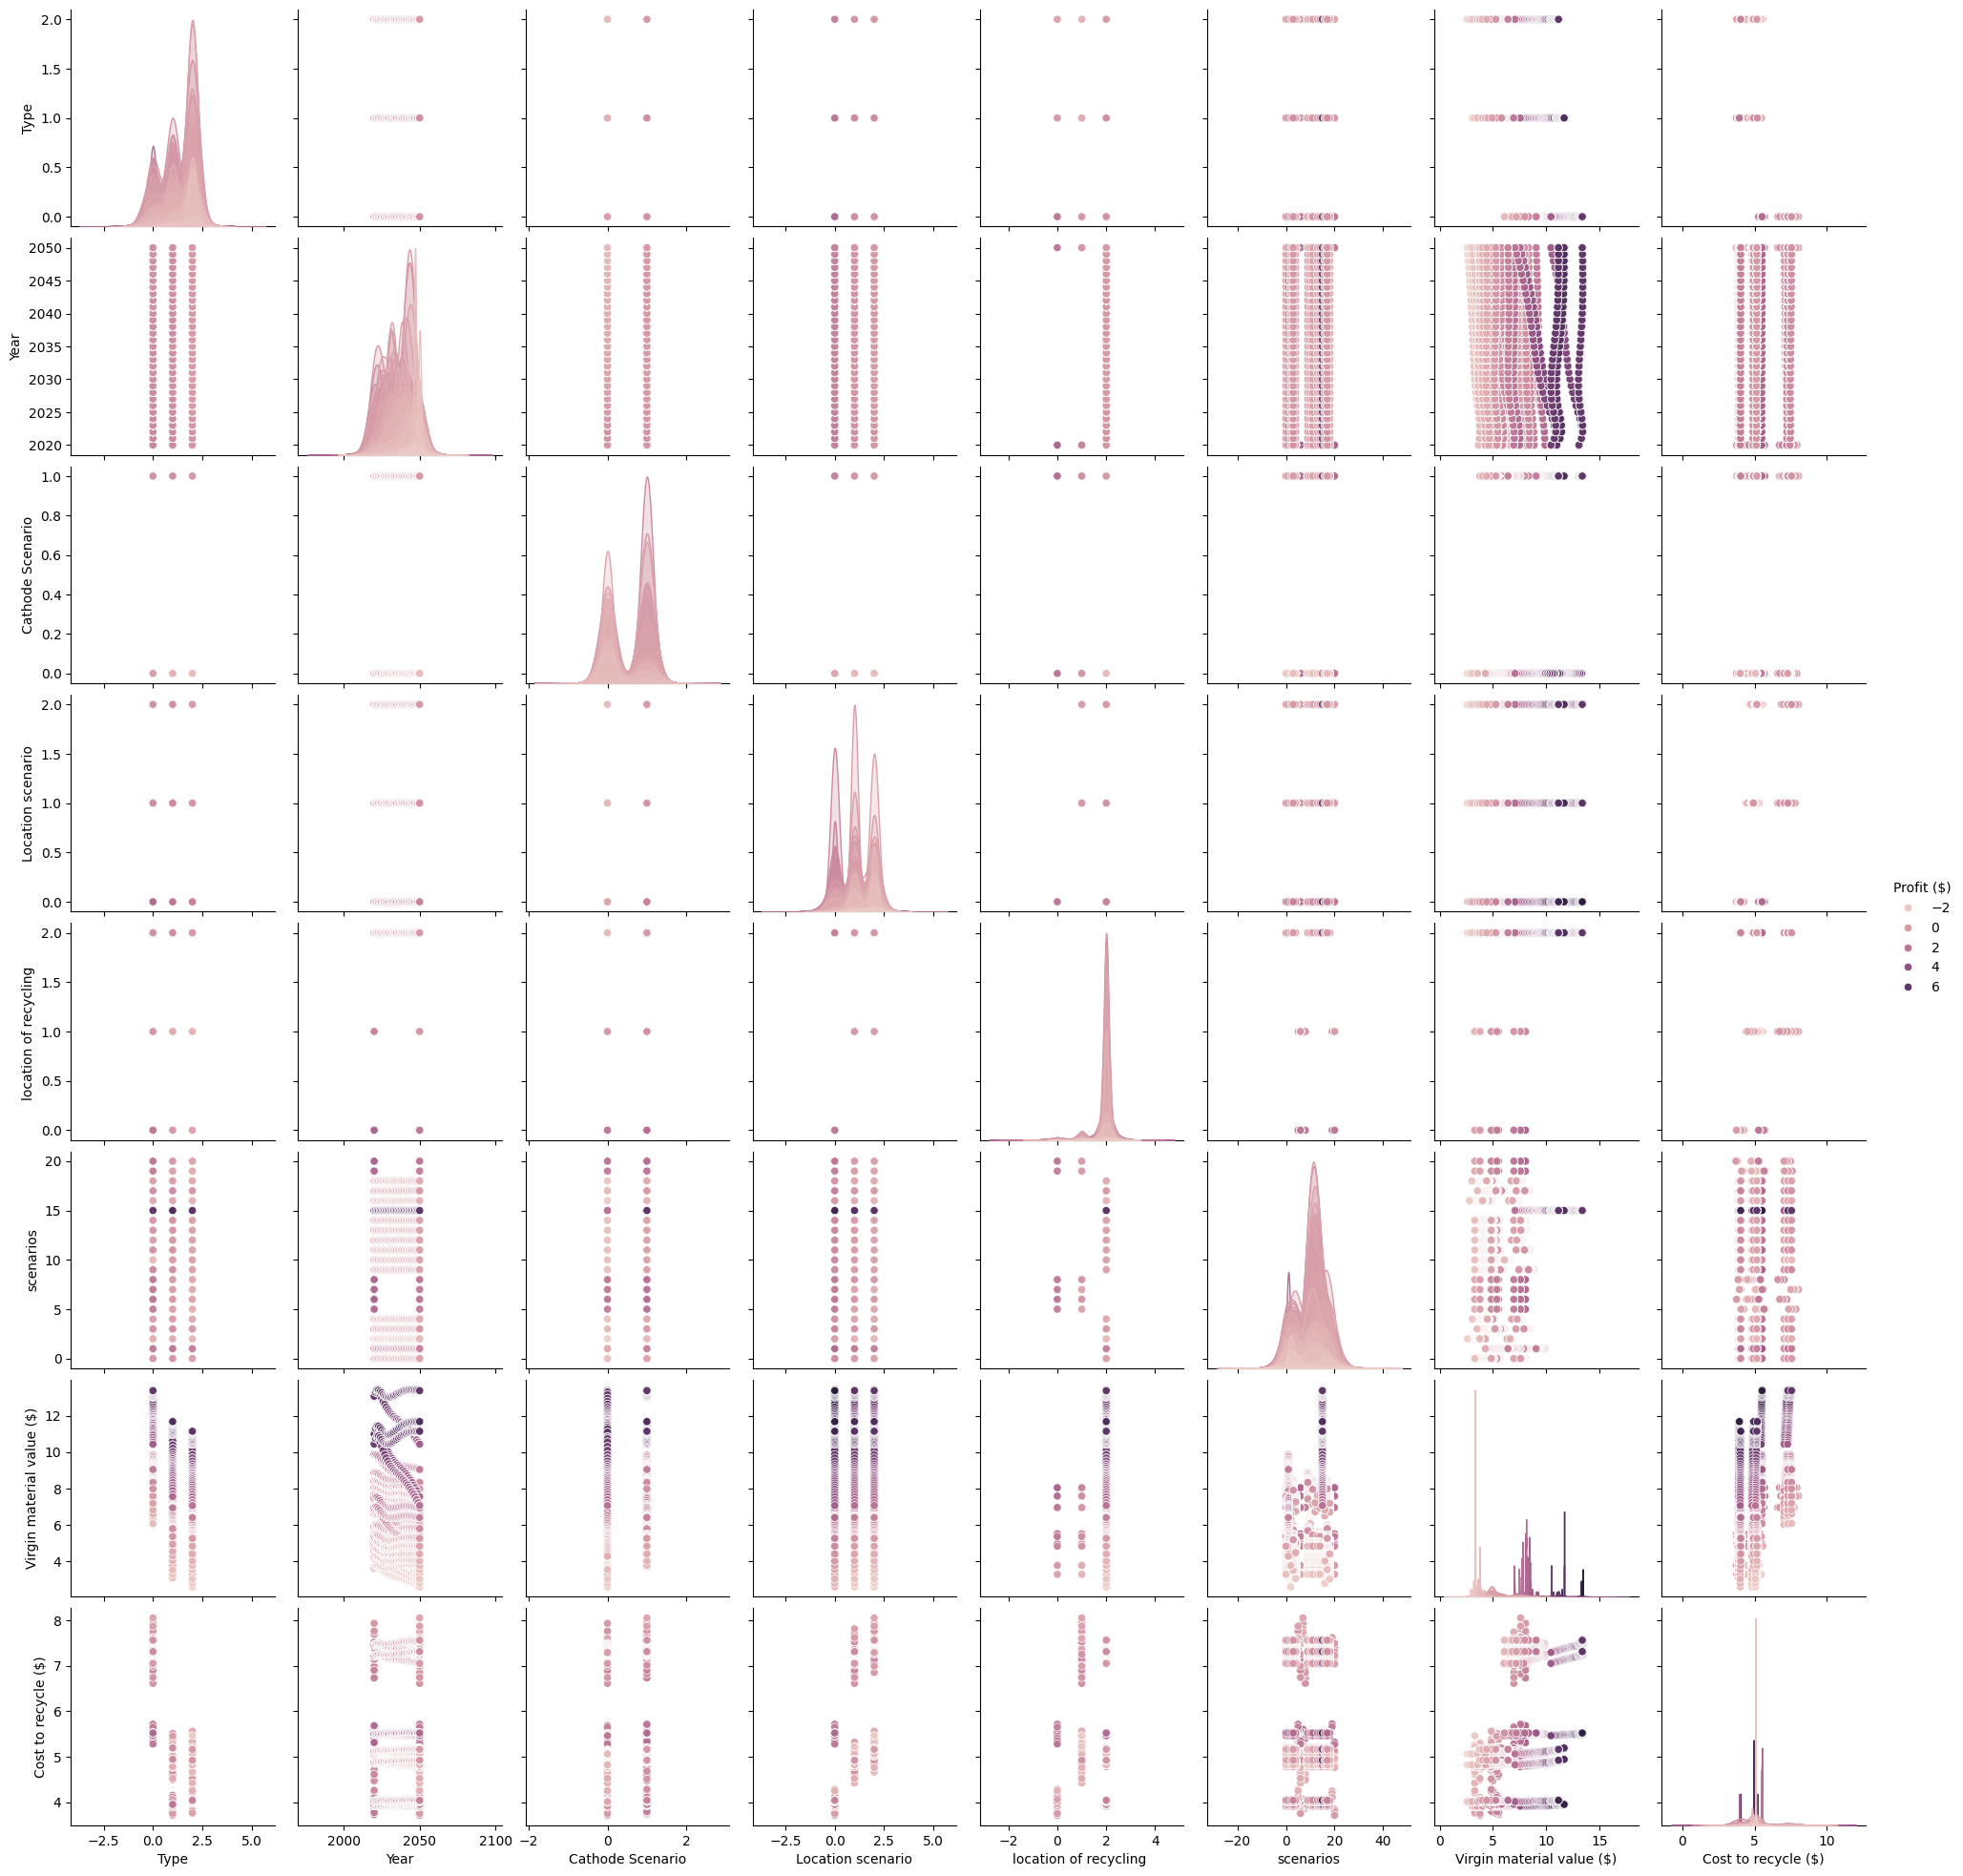

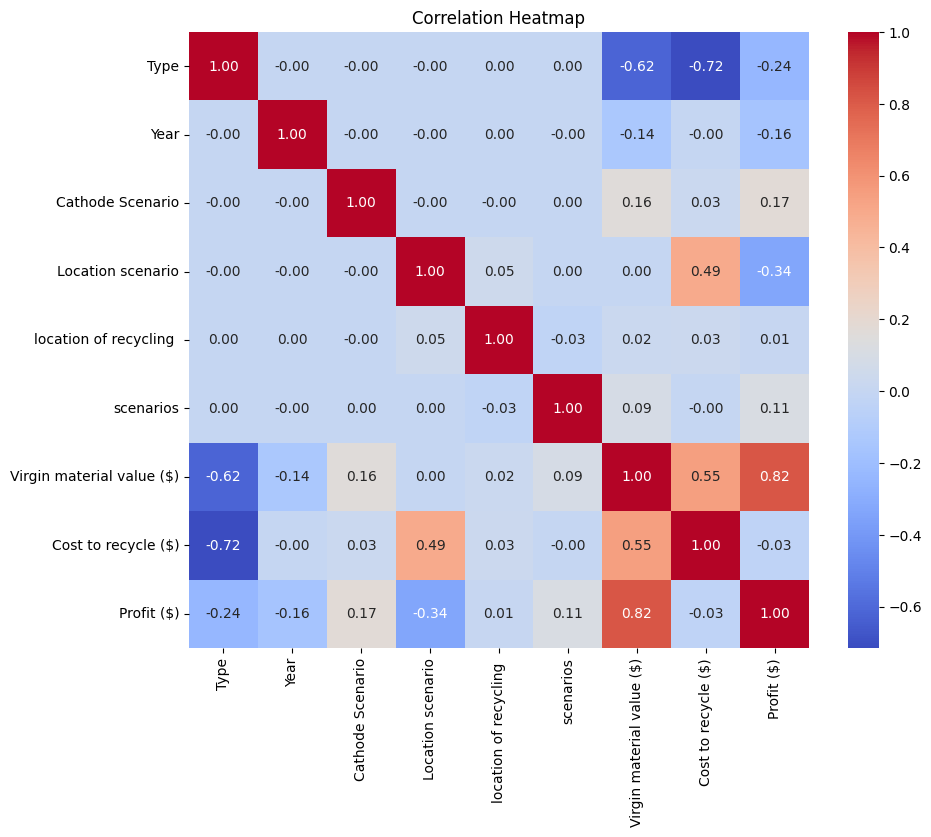

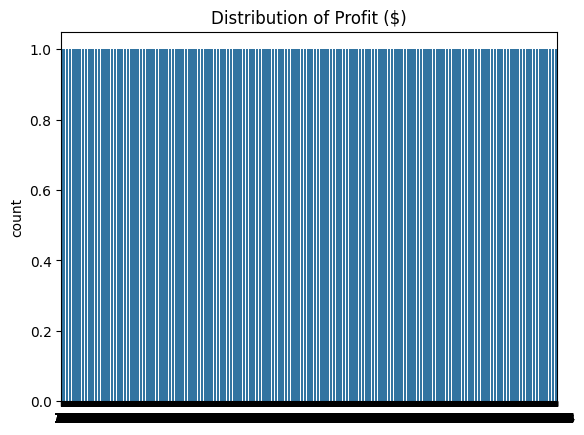

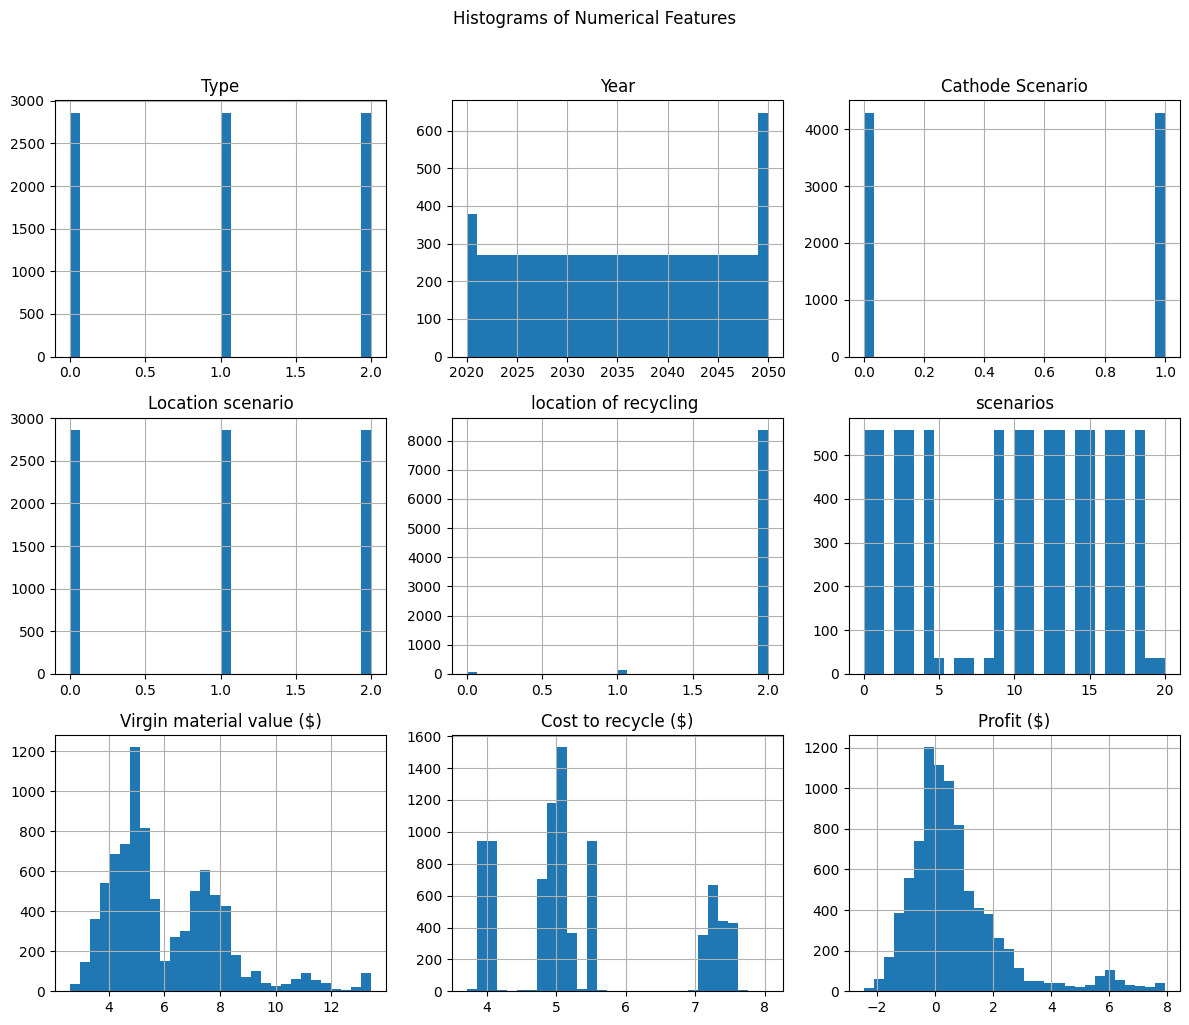

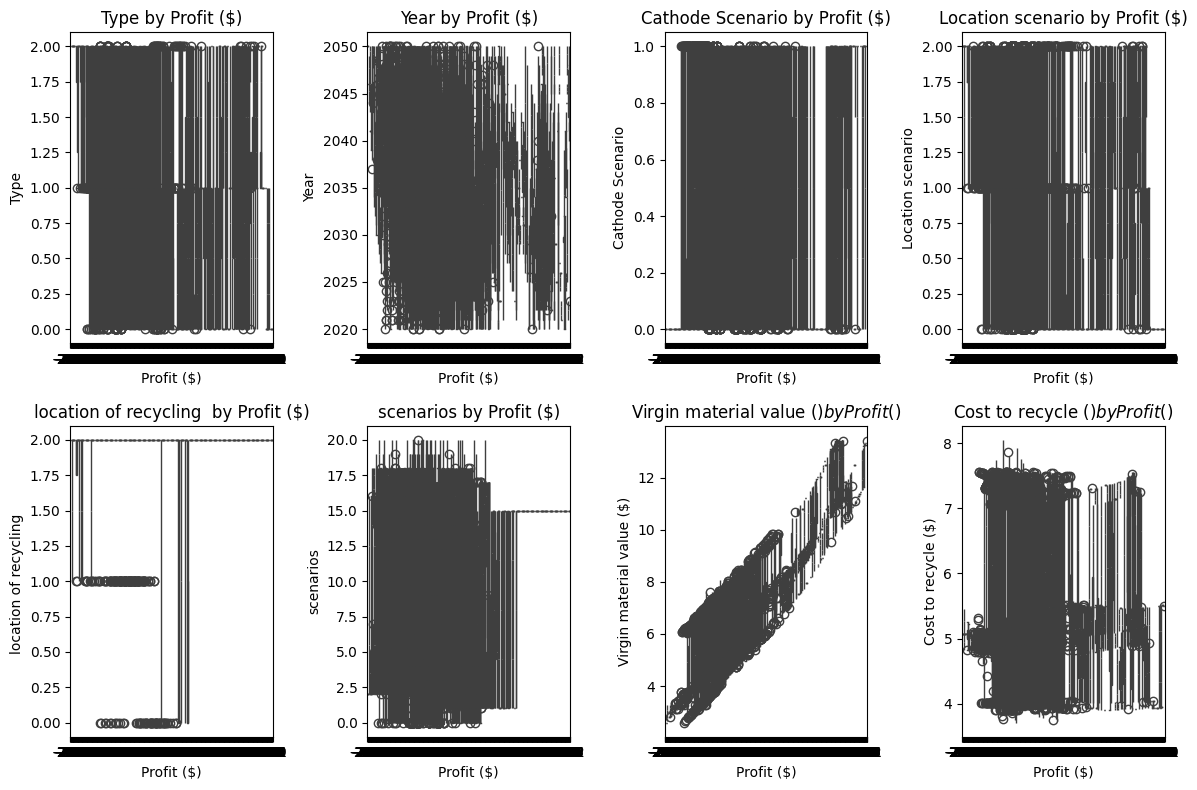

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  # Import matplotlib.pyplot

# Your existing code

# Step : Data Summary
print("Data Summary:")
print(data.head())
print("\nData Info:")
print(data.info())
print("\nData Statistics:")
print(data.describe())

# Step : Data Visualization and EDA
# Pairplot for visualizing relationships between features
sns.pairplot(data, hue='Profit ($)', diag_kind='kde')
plt.show()

# Correlation Heatmap
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of the target variable 'Outcome'
sns.countplot(data['Profit ($)'])
plt.title('Distribution of Profit ($)')
plt.show()

# Histograms of numerical features
data.hist(figsize=(12, 10), bins=30)
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()


# Boxplots for numerical features by Outcome
numerical_features = data.drop('Profit ($)', axis=1).columns
num_features = len(numerical_features)

# Adjust the subplot configuration based on the number of features
num_rows = (num_features // 4) + (num_features % 4 > 0)
num_cols = min(num_features, 4)

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x='Profit ($)', y=feature, data=data)
    plt.title(f'{feature} by Profit ($)')
plt.tight_layout()
plt.show()


In [29]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [24]:
!pip install lime


In [30]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import lime
import lime.lime_tabular
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Assuming you have your data loaded in X_train, X_val, y_train, y_val as per your previous code

# Train the ensemble model (Random Forest + Extra Trees)
random_forest = RandomForestRegressor()
extra_trees = ExtraTreesRegressor()

# Fit the ensemble model
random_forest.fit(X_train, y_train)
extra_trees.fit(X_train, y_train)

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=X_train.columns,
                                                   class_names=['Profit ($)'],
                                                   mode='regression')

# Define function to predict using the ensemble model
predict_fn = lambda x: (random_forest.predict(x) + extra_trees.predict(x)) / 2  # Take the average of predictions

# Select an observation from the validation set for which you want to explain predictions
observation_idx = 0  # Change this index according to your choice

# Explain the prediction for the selected observation
exp = explainer.explain_instance(X_val.values[observation_idx],
                                 predict_fn,
                                 num_features=len(X_train.columns))

# Plot the explanation for feature importance
exp.show_in_notebook(show_table=True, show_all=False)

# Save the explanation image
exp.save_to_file('lime_explanation.png')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


In [31]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import lime
import lime.lime_tabular
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Assuming you have your data loaded in X_train, X_val, y_train, y_val as per your previous code

# Train the ensemble model (Random Forest + Extra Trees)
random_forest = RandomForestRegressor()
extra_trees = ExtraTreesRegressor()

# Fit the ensemble model
random_forest.fit(X_train, y_train)
extra_trees.fit(X_train, y_train)

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=X_train.columns,
                                                   class_names=['Profit ($)'],
                                                   mode='regression')

# Define function to predict using the ensemble model
predict_fn = lambda x: (random_forest.predict(x) + extra_trees.predict(x)) / 2  # Take the average of predictions

# Select an observation from the validation set for which you want to explain predictions
observation_idx = 0  # Change this index according to your choice

# Explain the prediction for the selected observation
exp = explainer.explain_instance(X_val.values[observation_idx],
                                 predict_fn,
                                 num_features=len(X_train.columns))

# Plot the explanation for feature importance
exp.show_in_notebook(show_table=True, show_all=False)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


Actual Value: 0.23
Predicted Value: 0.22950000000000031


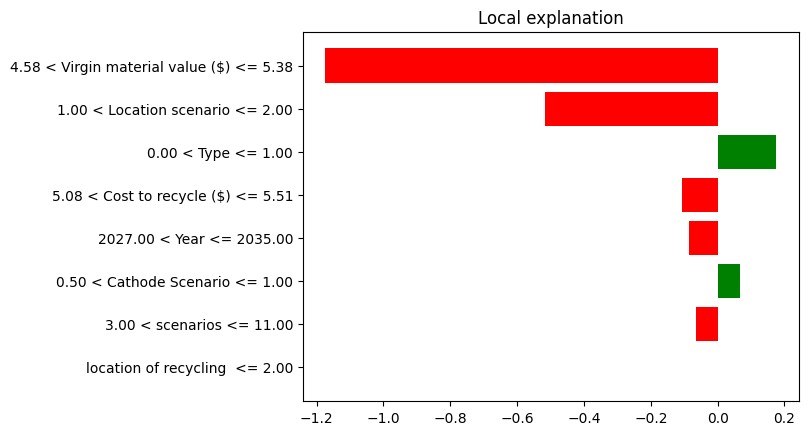

In [32]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import lime
import lime.lime_tabular
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Train the ensemble model (Random Forest + Extra Trees)
random_forest = RandomForestRegressor()
extra_trees = ExtraTreesRegressor()

# Fit the ensemble model
random_forest.fit(X_train, y_train)
extra_trees.fit(X_train, y_train)

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=X_train.columns,
                                                   class_names=['Profit ($)'],
                                                   mode='regression')

# Define function to predict using the ensemble model
predict_fn = lambda x: (random_forest.predict(x) + extra_trees.predict(x)) / 2  # Take the average of predictions

# Select an instance for which you want to explain predictions
# For example, let's say the instance is the first instance in the validation set
instance_idx = 0  # Change this index according to your choice

# Get the actual and predicted values for the selected instance
actual_value = y_val.iloc[instance_idx]
predicted_value = predict_fn(X_val.values[[instance_idx]]).squeeze()

# Explain the prediction for the selected instance
exp = explainer.explain_instance(X_val.values[instance_idx],
                                 predict_fn,
                                 num_features=len(X_train.columns))

# Plot the explanation for feature importance
fig = exp.as_pyplot_figure()

# Save the plot along with actual and predicted values in a PDF file
#with PdfPages('explanation_plot_ensemble.pdf') as pdf:
    #pdf.savefig(fig)
    #plt.text(0.1, -0.15, f"Actual Value: {actual_value}\nPredicted Value: {predicted_value}", transform=fig.transFigure, fontsize=12)

# Print actual and predicted values
print("Actual Value:", actual_value)
print("Predicted Value:", predicted_value)
